In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('../src')
print(sys.path)
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

['D:\\Projects\\AutoCorrect\\model\\HTR\\notebooks', 'D:\\tensorflow\\models\\research', 'D:\\tensorflow\\models\\research\\slim', 'C:\\anaconda', 'D:\\Projects\\AutoCorrect\\model\\HTR\\notebooks', 'C:\\anaconda\\python37.zip', 'C:\\anaconda\\DLLs', 'C:\\anaconda\\lib', '', 'C:\\Users\\Ansh Sarkar\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\anaconda\\lib\\site-packages', 'C:\\anaconda\\lib\\site-packages\\win32', 'C:\\anaconda\\lib\\site-packages\\win32\\lib', 'C:\\anaconda\\lib\\site-packages\\Pythonwin', 'C:\\anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Ansh Sarkar\\.ipython', '../src']
Loading segmentation models...
INFO:tensorflow:Restoring parameters from D:\Projects\AutoCorrect\model\HTR\src\ocr\../../models/gap-clas/CNN-CG
INFO:tensorflow:Restoring parameters from D:\Projects\AutoCorrect\model\HTR\src\ocr\../../models/gap-clas/RNN/Bi-RNN-new


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [3]:
IMG = '../data/ml.png'    # 1, 2, 3
LANG = 'en'
# You can use only one of these two
# You HABE TO train the CTC model by yourself using word_classifier_CTC.ipynb
MODEL_LOC_CHARS = '../models/char-clas/' + LANG + '/CharClassifier'

In [4]:
CHARACTER_MODEL = Model(MODEL_LOC_CHARS)

INFO:tensorflow:Restoring parameters from ../models/char-clas/en/CharClassifier


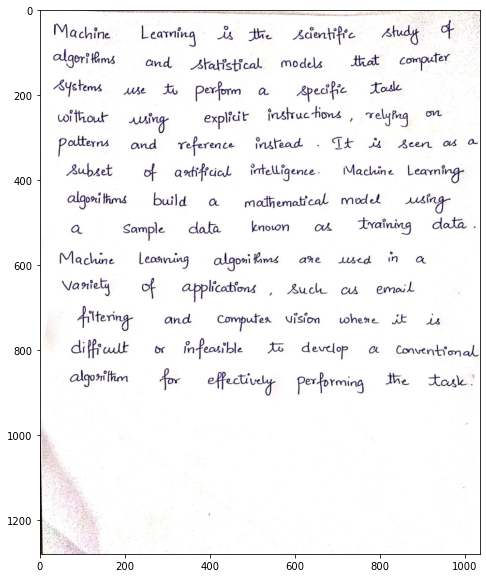

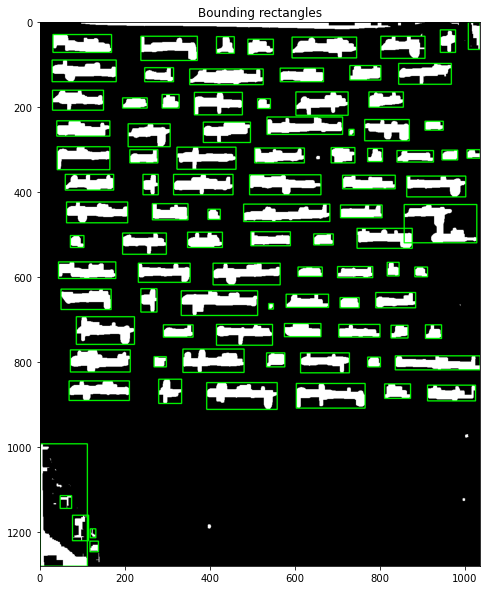

In [5]:
# Crop image and get bounding boxes
image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

In [6]:
from textblob import TextBlob
import sys
import argparse
import cv2
import editdistance
from DataLoader import DataLoader, Batch
from Model import Model, DecoderType
from SamplePreprocessor import preprocess

In [7]:
decoderType = DecoderType.BestPath
model = Model(open('D:\Projects\AutoCorrect\model\HTR\model\charList.txt').read(), decoderType, mustRestore=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtyp

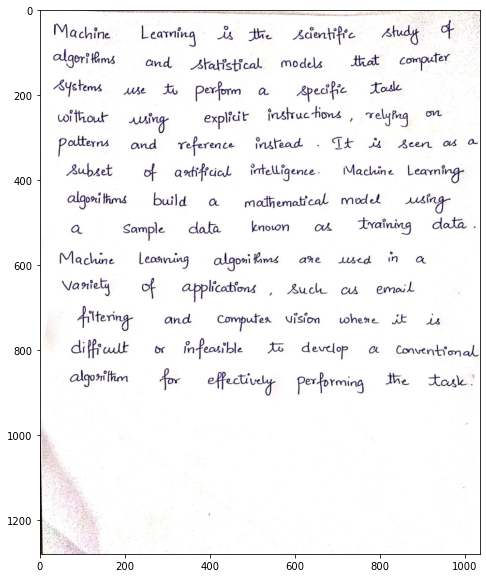

In [8]:
from spellchecker import SpellChecker
spell = SpellChecker()
def recognise(img):
    """Recognition using character model"""
    # Pre-processing the word
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = preprocess(img, Model.imgSize)
    batch = Batch(None, [img])
    (recognized, probability) = model.inferBatch(batch, True)
    #return str(TextBlob(recognized[0]).correct())
    #return recognized[0]
    return spell.correction(recognized[0])

implt(crop)

text = []
for line in lines:
    text.extend([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line])
    

In [ ]:
print(' '.join(text))
for idx, word in enumerate(text):
    if word[0].isupper() and text[idx-1] != '.' and text[idx-1][-1]!= '.' and idx!=0:
        text.insert(idx,'.')
        
s = ' '.join(text)
with open("../../../ans_ml.txt","w") as f:
     f.write(s)